In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

In [2]:
%load_ext lab_black

In [3]:
import plotting
import bivariate_plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_hotspopt_dict_county()

In [4]:
data = pd.read_csv("hotspot_vind_county.csv", dtype={"COUNTY_CODE": str})
data = data.rename(columns={"STCNTY": "name", "0": "y"})

data["y"] = data["y"] * 100
data["y"] = data["y"].astype(np.int64)

In [5]:
#### Load geospatial data (GeoJSON)
gdf = gpd.read_file(
    "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    driver="GeoJSON",
)

In [6]:
gdf = gdf.merge(data, left_on="id", right_on="COUNTY_CODE")

In [7]:
# Custom colormap
colors = bivariate_plotting.color_sets["pink-blue"]
cmap = ListedColormap(colors)

/var/folders/b_/vlxgm9n10bz569rffzmcc5dc0000gn/T/ipykernel_55386/3414292770.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


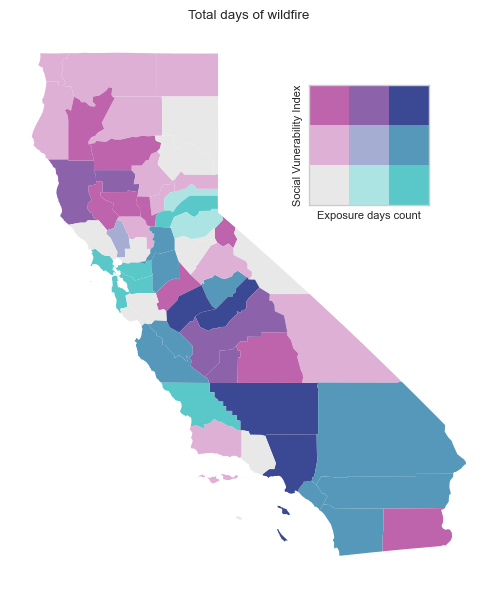

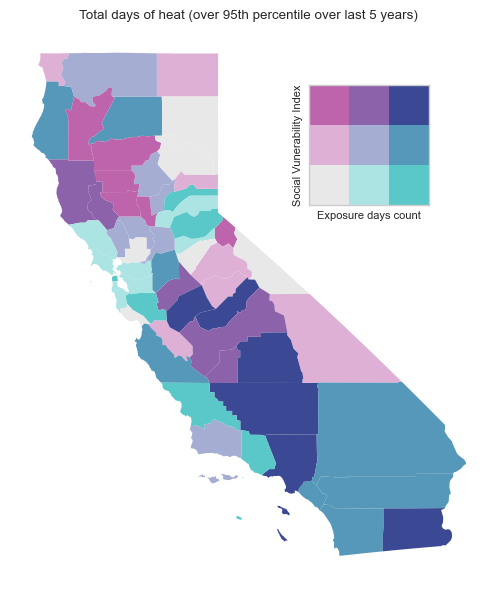

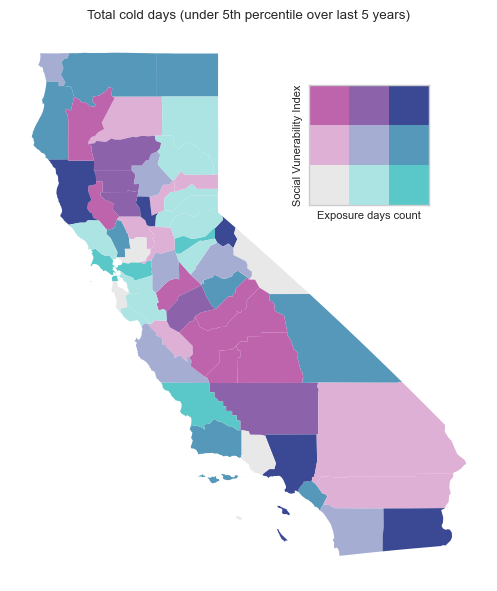

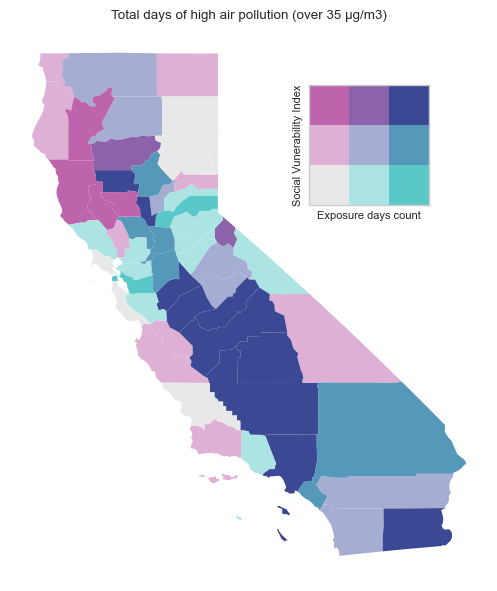

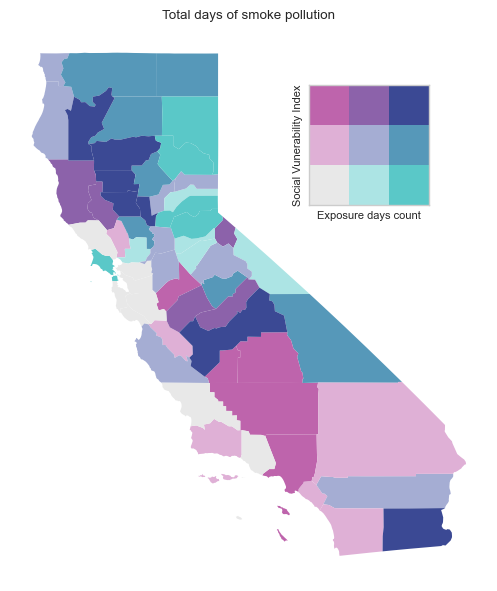

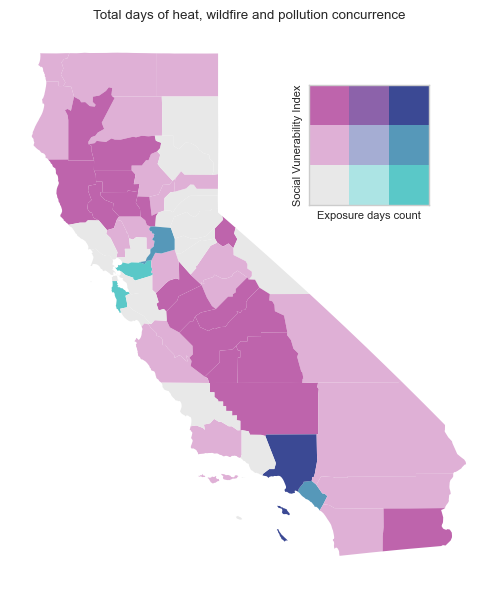

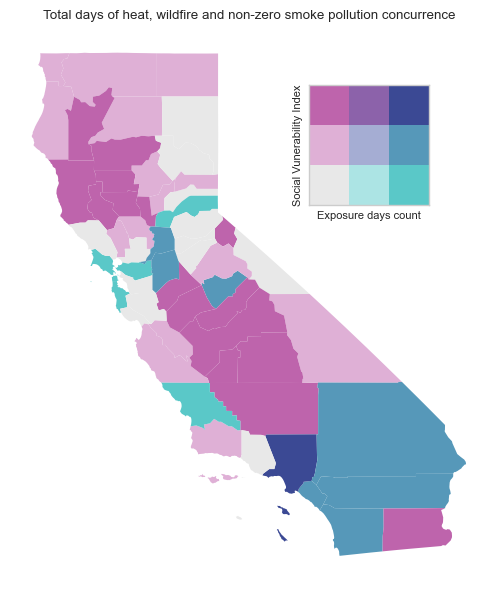

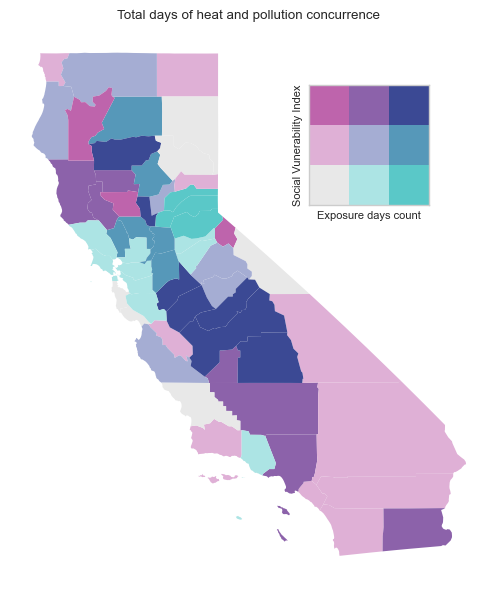

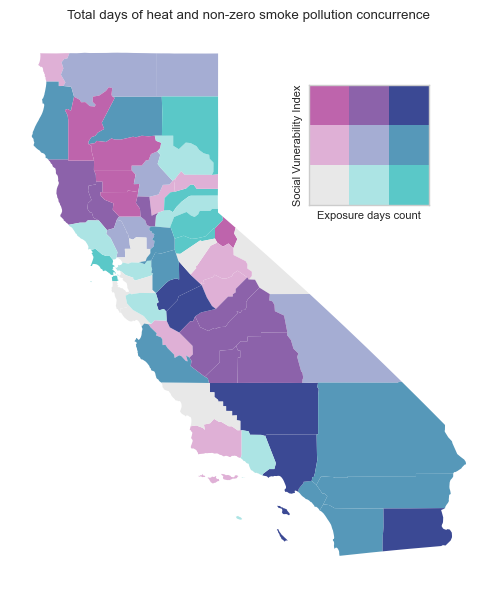

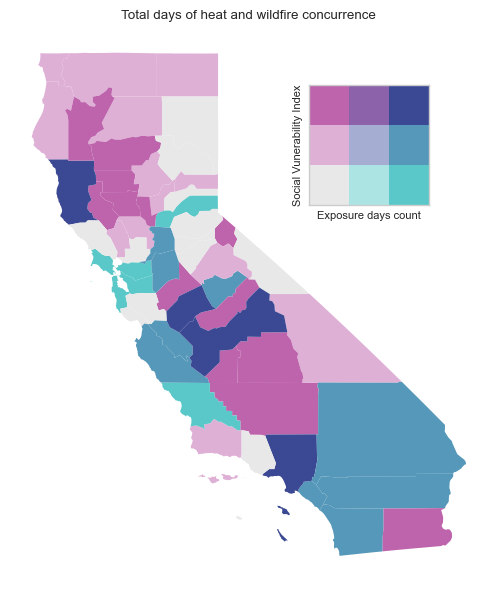

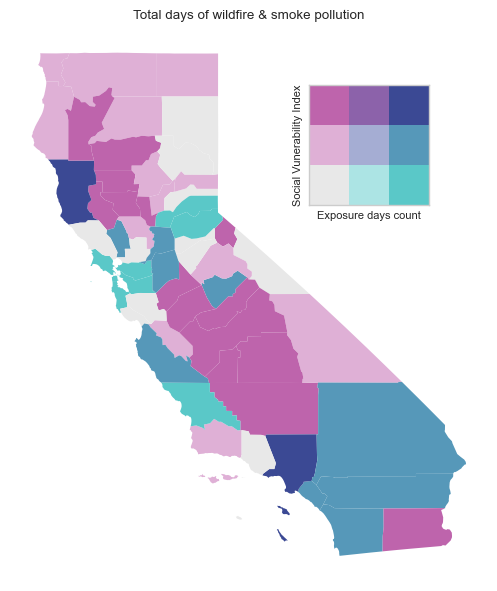

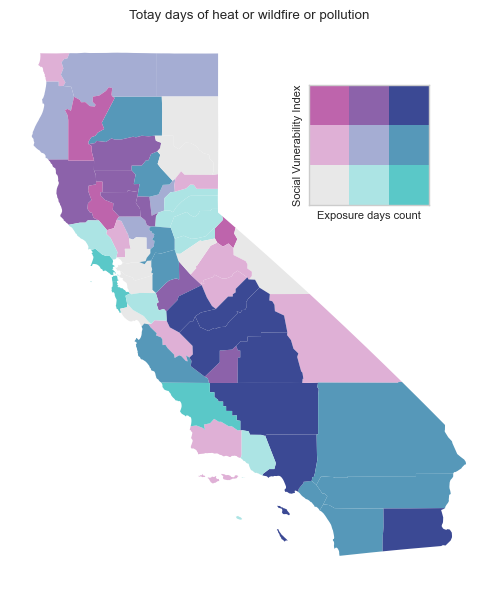

In [9]:
for x in hs_dict.keys():
    gdf = bivariate_plotting.prepare_df(gdf, x=x, y="y")
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))

    # Assuming 'data' is a Geopandas dataframe
    gdf.plot(
        column="biv_bins",
        ax=ax,
        cmap=cmap,
        legend=False,
        linewidth=0,
        missing_kwds={"color": "lightgrey"},
    )
    ax.set_title(hs_dict[x]["title_map"])
    ax.set_axis_off()
    # Add a second axes for the colorbar
    ax2 = fig.add_axes([0.6, 0.65, 0.2, 0.2])
    data1 = np.array(
        [
            [7, 8, 9],
            [4, 5, 6],
            [1, 2, 3],
        ]
    )
    # Use imshow to display the color square in the second axes
    im = ax2.imshow(data1, cmap=cmap, aspect="auto")

    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.set_xlabel("Exposure days count", fontsize=8)
    ax2.set_ylabel("Social Vunerability Index", fontsize=8)

    # Show the plot
    plt.tight_layout()
    plt.savefig("figures/bivariate_county_" + hs_dict[x]["title"] + ".png")
    plt.show()